### 파일 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [17]:
import os
review_list = os.listdir('/content/drive/MyDrive/Colab Notebooks/11번가 리뷰')
review_list

['11번가_2점리뷰(4.7만).csv',
 '11번가_4점리뷰(9.8만).csv',
 '11번가_1점리뷰(4.6만).csv',
 '11번가_3점리뷰(8.2만).csv',
 '11번가_5점_리뷰(15만).csv',
 '11번가_리뷰(43만).csv',
 'NanumGothic.ttf']

In [5]:
import pandas as pd

In [11]:
cd "/content/drive/MyDrive/Colab Notebooks/11번가 리뷰" 

/content/drive/MyDrive/Colab Notebooks/11번가 리뷰


In [18]:
df_1점 = pd.read_csv(review_list[2], encoding='utf-8-sig', index_col=0)
df_2점 = pd.read_csv(review_list[0], encoding='utf-8-sig', index_col=0)
df_3점 = pd.read_csv(review_list[3], encoding='utf-8-sig', index_col=0)
df_4점 = pd.read_csv(review_list[1], encoding='utf-8-sig', index_col=0)
df_5점 = pd.read_csv(review_list[4], encoding='utf-8-sig', index_col=0)
df_all = pd.read_csv(review_list[5], encoding='utf-8-sig', index_col=0)

### 시각화 준비(자연어 처리 패키지 불러오기)

#### 한국어 폰트 설정

In [54]:
# 폰트 조정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path =  '/content/drive/MyDrive/Colab Notebooks/11번가 리뷰/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic


In [19]:
!pip3 install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 3.4 MB/s 
     |████████████████████████████████| 453 kB 58.6 MB/s 


In [20]:
from konlpy.tag import Okt
import nltk # 자연어처리 패키지

from collections import Counter

### 한국어 불용어
https://bab2min.tistory.com/544

위 링크에서 저장한 후 csv 변환한 후 가져옴

In [30]:
StopWords = pd.read_csv("한국어 불용어100.csv", encoding='utf-8-sig', header=None)

In [32]:
StopWords[0]

0      이
1      있
2      하
3      것
4      들
      ..
95     원
96     잘
97    통하
98    소리
99     놓
Name: 0, Length: 100, dtype: object

In [33]:
def count_noun(lines):
  okt = Okt()
  counts = Counter()
  stopwords = StopWords[0]

  for line in lines:
    tags = okt.pos(line, stem=True)
    for morph, tag in tags:
      if tag == 'Noun' and morph not in stopwords:
        counts[morph] +=1
  return counts

### 1~5점 명사 추출

In [34]:
noun_1점 = count_noun(df_1점['리뷰'])

In [37]:
noun_2점 = count_noun(df_2점['리뷰'])
noun_3점 = count_noun(df_3점['리뷰'])
noun_4점 = count_noun(df_4점['리뷰'])
noun_5점 = count_noun(df_5점['리뷰'])

### 워드 클라우드

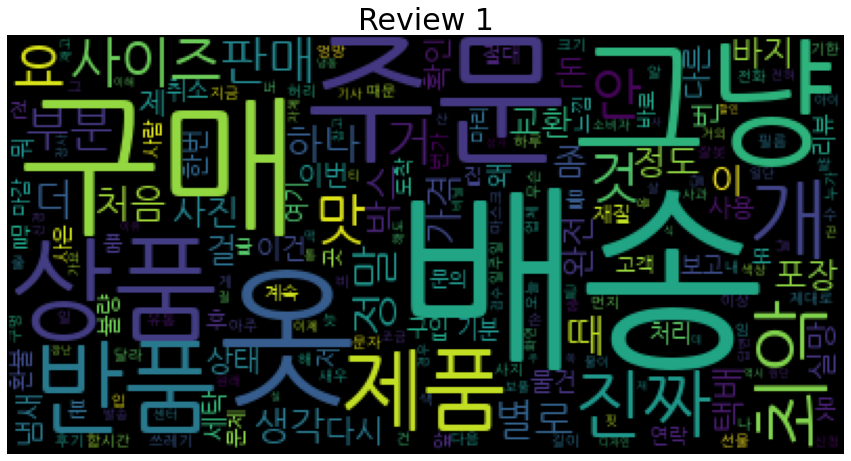

In [61]:
cloud = WordCloud(font_path=path)
cloud = cloud.fit_words(noun_1점)

plt.figure(figsize=(15,20))
plt.axis('off')
plt.imshow(cloud)
plt.title("Review 1", fontsize=30)
plt.savefig("1점 리뷰.png")
plt.show()

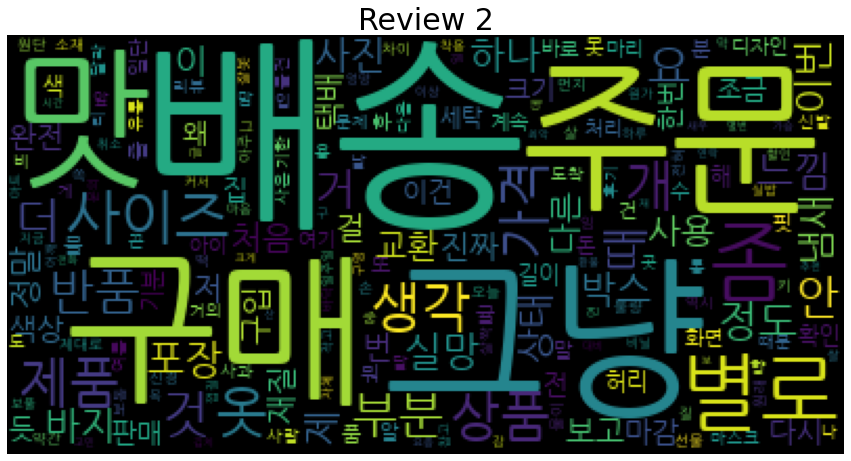

In [62]:
cloud = WordCloud(font_path=path)
cloud = cloud.fit_words(noun_2점)

plt.figure(figsize=(15,20))
plt.axis('off')
plt.imshow(cloud)
plt.title("Review 2", fontsize=30)
plt.savefig("2점 리뷰.png")
plt.show()

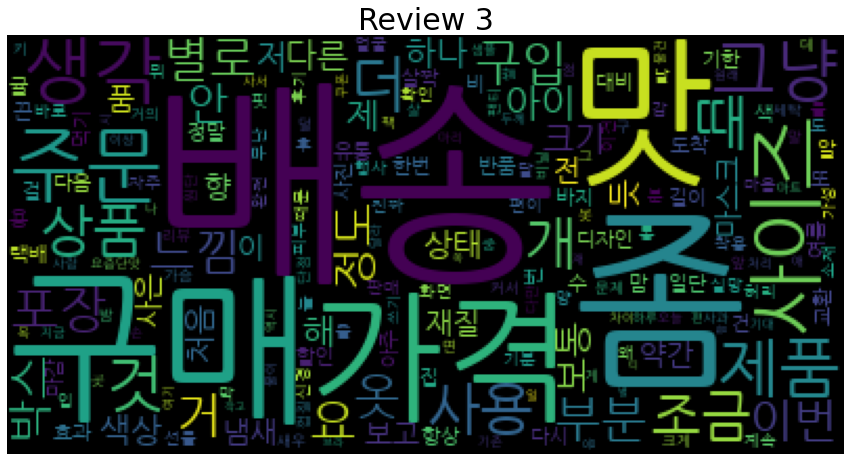

In [63]:
cloud = WordCloud(font_path=path)
cloud = cloud.fit_words(noun_3점)

plt.figure(figsize=(15,20))
plt.axis('off')
plt.imshow(cloud)
plt.title("Review 3", fontsize=30)
plt.savefig("3점 리뷰.png")
plt.show()

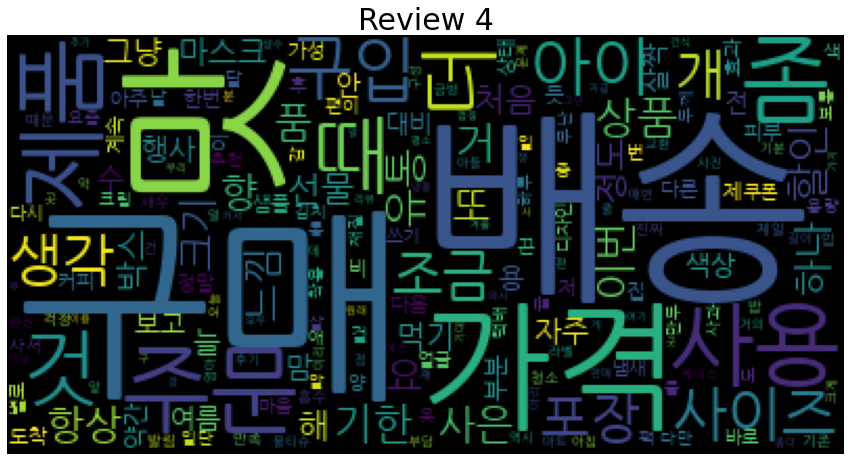

In [64]:
cloud = WordCloud(font_path=path)
cloud = cloud.fit_words(noun_4점)

plt.figure(figsize=(15,20))
plt.axis('off')
plt.imshow(cloud)
plt.title("Review 4", fontsize=30)
plt.savefig("4점 리뷰.png")
plt.show()

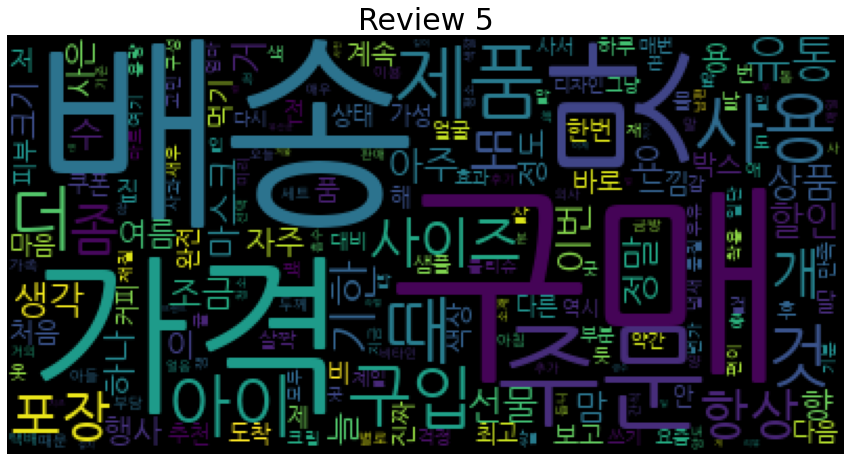

In [65]:
cloud = WordCloud(font_path=path)
cloud = cloud.fit_words(noun_5점)

plt.figure(figsize=(15,20))
plt.axis('off')
plt.imshow(cloud)
plt.title("Review 5", fontsize=30)
plt.savefig("5점 리뷰.png")
plt.show()

In [74]:
review_1점 = noun_1점.most_common(150)
review_2점 = noun_2점.most_common(150)
review_3점 = noun_3점.most_common(150)
review_4점 = noun_4점.most_common(150)
review_5점 = noun_5점.most_common(150)

In [78]:
data = pd.DataFrame([ x for x in zip(review_1점, review_2점,review_3점,review_4점,review_5점)],columns = ['1점_명사','2점_명사','3점_명사','4점_명사','5점_명사'])    

In [80]:
data.to_csv("11번가 리뷰 명사 빈도수 상위 150.csv", encoding='utf-8-sig')